<h1 style="color: #3636ff;">Линейная алгебра. Практическая работа №5</h1>

<a href="https://olgabelitskaya.github.io/README.html">&#x1F300; &nbsp; Home Page</a> &nbsp; &nbsp; <a href="https://github.com/OlgaBelitskaya/linear_algebra_practice/blob/master/work1_4.ipynb">📓 &nbsp; Previous</a> &nbsp; &nbsp; <a href="https://github.com/OlgaBelitskaya/linear_algebra_practice/blob/master/work1_6.ipynb">📓 &nbsp; Next</a>

### Программные средства

[LaTeX. Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[Sage. Basic Algebra and Calculus](http://doc.sagemath.org/html/en/tutorial/tour_algebra.html)

[Numpy. Quickstart tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html#linear-algebra)

[SymPy. Matrices (linear algebra)](https://docs.sympy.org/latest/modules/matrices/matrices.html)

[Quick-R. Matrix Algebra](https://www.statmethods.net/advstats/matrix.html)

[R: Solve a System of Equations](https://stat.ethz.ch/R-manual/R-devel/library/base/html/solve.html)

### Конспекты лекций

[Матрицы. Системы линейных уравнений. Алгоритм Гаусса](http://matematika.phys.msu.ru/files/a_stud_gen/246/AG-08_2009-2010.pdf)

[АЛГЕБРА И ГЕОМЕТРИЯ ДЛЯ СТУДЕНТОВ-ФИЗИКОВ](http://math.phys.msu.ru/data/24/Algebra_and_geometry.pdf)

[exponenta.ru Теоретическая справка](http://old.exponenta.ru/educat/class/courses/la/theme4/theory.asp)

# Системы линейных уравнений

## 1. Однородные и неоднородные системы.

In [23]:
%%html
<p style="color:slategray;">
$\mathscr{System\;1:\begin{cases} 
x + y - z = 0 \\ 
8x - y - 5z = 0 \\ 
-5x + y + 3z = 0 
\end{cases}}$</p>
<p style="color:darkblue;">
$\mathbb{System\;2:\begin{cases} 
8x_1 - 5x_2 - 2x_3 - 2x_4 = 35 \\ 
-2x_1 + 4x_2 - 4x_3 + x_4 = -8 \\ 
-2x_1 + x_2 + 4x_3 + 4x_4 = -11 \\ 
4x_1 + x_2 + 3x_3 + 10x_4 = 10  
\end{cases}}$</p>

In [24]:
var('x y z')
eq1=x+y-z==0; eq2=8*x-y-5*z==0; eq3=-5*x+y+3*z==0
var('x1 x2 x3 x4')
eq4=8*x1-5*x2-2*x3-2*x4==35
eq5=-2*x1+4*x2-4*x3+x4==-8
eq6=-2*x1+x2+4*x3+4*x4==-11
eq7=4*x1+x2+3*x3+10*x4==10
A=matrix(4,[8,-5,-2,-2,-2,4,-4,1,
            -2,1,4,4,4,1,3,10])
b=vector([35,-8,-11,10])
SA=matrix(3,var('a1 a2 a3 a4 a5 a6 a7 a8 a9'))
Sb=vector(var('b1 b2 b3'))

In [25]:
solve([eq1,eq2,eq3],x,y,z),
solve([eq4,eq5,eq6,eq7],x1,x2,x3,x4),
A.solve_right(b)

(1, -5, -3, 2)

In [26]:
import numpy,sympy
sympy.init_printing(use_unicode=True)
from sympy.abc import x,y,z,a,b,c,d,e,f
NA=numpy.array([[8,-5,-2,-2],[-2,4,-4,1],
                [-2,1,4,4],[4,1,3,10]])
Nb=numpy.array([35,-8,-11,10])
system1=sympy.Matrix([[1,1,-1,0],[8,-1,-5,0],[-5,1,3,0]])
system2=sympy.Matrix([[8,-5,-2,-2,35],[-2,4,-4,1,-8],
                      [-2,1,4,4,-11],[4,1,3,10,10]])
system3=sympy.Matrix([[2,3,2,-3,-9,-9,0],[2,-2,-3,-3,1,6,0],
                      [-1,2,1,3,-1,-3,0],[6,-3,-3,-12,-6,3,0]])
SA1=sympy.Matrix([[1,1,-1],[8,-1,-5],[-5,1,3]])
Sb1=sympy.Matrix([0,0,0])
SA2=sympy.Matrix([[8,-5,-2,-2],[-2,4,-4,1],
                  [-2,1,4,4],[4,1,3,10]])
Sb2=sympy.Matrix([35,-8,-11,10])

In [35]:
print(numpy.linalg.solve(NA,Nb))
sympy.solve_linear_system(system2,a,b,c,d)

[ 1. -5. -3.  2.]


⎛⎡2⋅τ₀⎤      ⎞
⎜⎢────⎥      ⎟
⎜⎢ 3  ⎥      ⎟
⎜⎢    ⎥      ⎟
⎜⎢ τ₀ ⎥, [τ₀]⎟
⎜⎢ ── ⎥      ⎟
⎜⎢ 3  ⎥      ⎟
⎜⎢    ⎥      ⎟
⎝⎣ τ₀ ⎦      ⎠


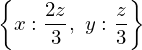

In [28]:
sympy.pprint(SA1.gauss_jordan_solve(Sb1))
sympy.solve_linear_system(system1,x,y,z)

Оценить время, затраченное на выполнение фрагмента программы, поможет несколько простых комманд.

In [29]:
import time
start_time=time.time()
sympy.solve_linear_system(system2,a,b,c,d)
print("--- %s seconds ---"%(time.time()-start_time))

--- 0.0188739299774 seconds ---


In [30]:
%timeit sympy.solve_linear_system(system3,a,b,c,d,e,f)

10 loops, best of 3: 68.6 ms per loop


In [31]:
%%r
A<-matrix(data=c(8,-5,-2,-2,-2,4,-4,1,
                 -2,1,4,4,4,1,3,10),
                 nrow=4,ncol=4,byrow=TRUE)    
b<-matrix(data=c(35,-8,-11,10),
          nrow=4,ncol=1,byrow=FALSE)
round(solve(A,b))

     [,1]
[1,]    1
[2,]   -5
[3,]   -3
[4,]    2


In [32]:
%%r
A; det(A)
qr(A)

$qr
           [,1]        [,2]       [,3]       [,4]
[1,] -9.3808315  4.90361648  0.4264014 -1.4924050
[2,] -0.2132007 -4.35368183  0.2505716 -8.1122561
[3,] -0.2132007 -0.03206531 -6.6899474 -7.2749548
[4,]  0.4264014  0.75320256  0.8396846 -0.1976392

$rank
[1] 4

$qraux
[1] 1.8528029 1.6570066 1.5430743 0.1976392

$pivot
[1] 1 2 3 4

attr(,"class")
[1] "qr"


In [19]:
%%r
library(matlib)
A<-matrix(c(8,-2,-2,4,-5,4,1,1,
            -2,-4,4,3,-2,1,4,10),4,4)    
b<-c(35,-8,-11,10)
showEqn(A,b) # display equations




 8*x1 - 5*x2 - 2*x3  - 2*x4  =   35 
-2*x1 + 4*x2 - 4*x3  + 1*x4  =   -8 
-2*x1 + 1*x2 + 4*x3  + 4*x4  =  -11 
 4*x1 + 1*x2 + 3*x3 + 10*x4  =   10 


In [20]:
%%r
c(R(A),R(cbind(A,b))) # ranks

[1] 4 4


In [21]:
%%r
Solve(A,b)

x1        =   1 
  x2      =  -5 
    x3    =  -3 
      x4  =   2 


## 2. Правило Крамера.

Алгоритм решения:

1) вычисляем определитель основной матрицы системы (должен быть ненулевым);

2) вычисляем определители матриц, 

   полученных заменой каждого столбца основной матрицы столбцом свободных членов;
   
3) вычисляем значения переменных как отношение 

   определителя с замененным соответствующим столбцом к определителю основной матрицы.

In [33]:
X1=copy(SA); X2=copy(SA); X3=copy(SA)
X1[:,0]=Sb; X2[:,1]=Sb; X3[:,2]=Sb
x1=X1.det()/SA.det()
x2=X2.det()/SA.det()
x3=X3.det()/SA.det()
for el in [[X1,X2,X3],x1,x2,x3]: pretty_print(el)

[
[b1 a2 a3]  [a1 b1 a3]  [a1 a2 b1]
[b2 a5 a6]  [a4 b2 a6]  [a4 a5 b2]
[b3 a8 a9], [a7 b3 a9], [a7 a8 b3]
]

((a6*a8 - a5*a9)*b1 - (a3*a8 - a2*a9)*b2 + (a3*a5 - a2*a6)*b3)/((a6*a8 - a5*a9)*a1 - (a3*a8 - a2*a9)*a4 + (a3*a5 - a2*a6)*a7)

-((a9*b2 - a6*b3)*a1 - (a9*b1 - a3*b3)*a4 + (a6*b1 - a3*b2)*a7)/((a6*a8 - a5*a9)*a1 - (a3*a8 - a2*a9)*a4 + (a3*a5 - a2*a6)*a7)

((a8*b2 - a5*b3)*a1 - (a8*b1 - a2*b3)*a4 + (a5*b1 - a2*b2)*a7)/((a6*a8 - a5*a9)*a1 - (a3*a8 - a2*a9)*a4 + (a3*a5 - a2*a6)*a7)

In [37]:
A=matrix(4,[8,-5,-2,-2,-2,4,-4,1,-2,1,4,4,4,1,3,10])
b=vector([35,-8,-11,10])
X1=copy(A); X2=copy(A); X3=copy(A); X4=copy(A)
X1[:,0]=b; X2[:,1]=b; X3[:,2]=b; X4[:,3]=b
x1=X1.det()/A.det()
x2=X2.det()/A.det()
x3=X3.det()/A.det()
x4=X4.det()/A.det()
[x1,x2,x3,x4]

[1, -5, -3, 2]

In [39]:
X1=NA.copy(); X2=NA.copy(); X3=NA.copy(); X4=NA.copy()
X1[:,0]=Nb; X2[:,1]=Nb; X3[:,2]=Nb; X4[:,3]=Nb
x1=numpy.linalg.det(X1)/numpy.linalg.det(NA)
x2=numpy.linalg.det(X2)/numpy.linalg.det(NA)
x3=numpy.linalg.det(X3)/numpy.linalg.det(NA)
x4=numpy.linalg.det(X4)/numpy.linalg.det(NA)
[[x1,x2,x3,x4],
 [round(el) for el in [x1,x2,x3,x4]]]

In [40]:
X1=SA2.copy(); X2=SA2.copy(); X3=SA2.copy(); X4=SA2.copy()
X1.col_del(0); X2.col_del(1); X3.col_del(2); X4.col_del(3)
X1=X1.col_insert(int(0),Sb2); X2=X2.col_insert(int(1),Sb2)
X3=X3.col_insert(int(2),Sb2); X4=X4.col_insert(int(3),Sb2)
x1=X1.det()/SA2.det(); x2=X2.det()/SA2.det()
x3=X3.det()/SA2.det(); x4=X4.det()/SA2.det()
[x1,x2,x3,x4]

In [41]:
%%r
X1<-A; X1[1:4,1]<-b; X2<-A; X2[1:4,2]<-b
X3<-A; X3[1:4,3]<-b; X4<-A; X4[1:4,4]<-b
x1<-det(X1)/det(A); x2<-det(X2)/det(A)
x3<-det(X3)/det(A); x4<-det(X4)/det(A)
c(x1,x2,x3,x4)

[1]  1 -5 -3  2


## 3. Алгоритм Гаусса.
Последовательное исключение неизвестных и приведение матрицы коеффициентов уравнения к верхнему треугольному виду.

Элементарные преобразования:

1) перестановка строк;

2) удаление строк  нулевыми коэффициентами;

3) умножение любой строки на ненулевую константу;

4) прибавление к строке любой другой строки.

Шаги алгоритма:

1) выберем "разрешающую" строку с наименьшим количеством нулей, считая от начала;

2) разделим эту "разрешающую" строку на ее первый ненулевой элемент, стоящий на k-ой позиции от начала; 

3) переставим полученную строку на k-ую позицию среди строк;

4) вычтем из каждой строки матрицы "разрешающую" строку, умноженную на элемент обрабатываемой строки в k-ом столбце,

   k-ый столбец станет столбцом единичной матрицы;
   
5) продолжим процесс до того приведения матрицы к верхнему треугольному виду.

При вычислениях можно избежать дробей, применив элементарные преобразования.

In [42]:
Ab=A.augment(b); Ab.echelon_form(),Ab.rref()

(
[ 2  0  0  9 20]  [ 1  0  0  0  1]
[ 0  1  0 10 15]  [ 0  1  0  0 -5]
[ 0  0  1 21 39]  [ 0  0  1  0 -3]
[ 0  0  0 27 54], [ 0  0  0  1  2]
)

In [43]:
SAb=sympy.Matrix([[8,-5,-2,-2,35],[-2,4,-4,1,-8],
                  [-2,1,4,4,-11],[4,1,3,10,10]])
sympy.pprint(SAb)
# Умножим 2-ую и 3-ю строки на 4, 4-ую - на -2 и сложим с 1-ой:
SAb[1,:]=4*SAb.row(1)+SAb.row(0)
SAb[2,:]=4*SAb.row(2)+SAb.row(0)
SAb[3,:]=-2*SAb.row(3)+SAb.row(0)
sympy.pprint(SAb)

⎡8   -5  -2  -2  35 ⎤
⎢                   ⎥
⎢-2  4   -4  1   -8 ⎥
⎢                   ⎥
⎢-2  1   4   4   -11⎥
⎢                   ⎥
⎣4   1   3   10  10 ⎦
⎡8  -5  -2   -2   35⎤
⎢                   ⎥
⎢0  11  -18   2   3 ⎥
⎢                   ⎥
⎢0  -1  14   14   -9⎥
⎢                   ⎥
⎣0  -7  -8   -22  15⎦


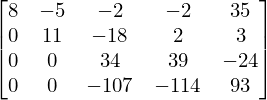

In [44]:
# Умножим 3-ю строчку на 11 и сложим со 2-й; 
# умножим 2-ую на 7, 4-ую - на 11 и сложим
# Поделим 3-ю строчку на 4, 4-ую - на 2
SAb[2,:]=(11*SAb.row(2)+SAb.row(1))/4
SAb[3,:]=(11*SAb.row(3)+7*SAb.row(1))/2
SAb

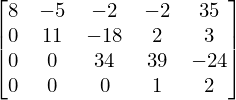

In [45]:
# Умножим 3-ю строчку на 107, 4-ую - на 34 и сложим
# Поделим 4-ю на 297
SAb[3,:]=(34*SAb.row(3)+107*SAb.row(2))/297
SAb

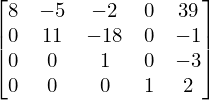

In [46]:
# Умножим 4-ю строчку на -39 и сложим с 3-ей, 
# 4-ю - на -2 и сложим со 2-ой, 4-ю - на 2 и сложим со 1-ой
# Поделим 3-ю на 34
SAb[0,:]=(SAb.row(0)+2*SAb.row(3))
SAb[1,:]=(SAb.row(1)-2*SAb.row(3))
SAb[2,:]=(SAb.row(2)-39*SAb.row(3))/34
SAb

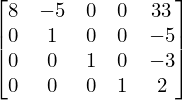

In [47]:
# Умножим 3-ю строчку на 2 и сложим со 1-ой, 3-ю - на 18 и сложим со 2-ой
# Поделим 2-ю на 11
SAb[0,:]=SAb.row(0)+2*SAb.row(2)
SAb[1,:]=(SAb.row(1)+18*SAb.row(2))/11
SAb

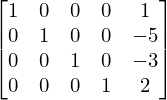

In [48]:
# Умножим 2-ю строчку на 5 и сложим со 1-ой
# Поделим 1-ю на 8
SAb[0,:]=(SAb.row(0)+5*SAb.row(1))/8
SAb

In [49]:
%%r
rref<-function(m){
  pivot<-1
  for (r in 1:nrow(m)){
    if (ncol(m)<=pivot) break;
    i<-r
    while (m[i,pivot]==0){i<-i+1; 
        if (nrow(m)==i){i<-r; pivot<-pivot+1; 
                        if (ncol(m)==pivot) return(m)}}
    trow<-m[i,]; m[i,]<-m[r,]; m[r,]<-trow; m[r,]<-m[r,]/m[r,pivot]
    for (i in 1:nrow(m)){if (i!=r) m[i,]<-m[i,]-m[r,]*m[i,pivot]}
    pivot<-pivot+1}
  return(m)}
A<-matrix(c(8,-5,-2,-2,35,-2,4,-4,1,-8,
            -2,1,4,4,-11,4,1,3,10,10),
            4,5,byrow=T)
rref(A)

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    0    0    0    1
[2,]    0    1    0    0   -5
[3,]    0    0    1    0   -3
[4,]    0    0    0    1    2


In [25]:
%%r
A<-matrix(c(8,-2,-2,4,-5,4,1,1,
            -2,-4,4,3,-2,1,4,10),4,4)    
b<-c(35,-8,-11,10)
echelon(A, b, verbose=TRUE, fractions=TRUE)




Initial matrix:
     [,1] [,2] [,3] [,4] [,5]
[1,]   8   -5   -2   -2   35 
[2,]  -2    4   -4    1   -8 
[3,]  -2    1    4    4  -11 
[4,]   4    1    3   10   10 

row: 1 

 multiply row 1 by 1/8 
     [,1] [,2] [,3] [,4] [,5]
[1,]    1 -5/8 -1/4 -1/4 35/8
[2,]   -2    4   -4    1   -8
[3,]   -2    1    4    4  -11
[4,]    4    1    3   10   10

 multiply row 1 by 2 and add to row 2 
     [,1] [,2] [,3] [,4] [,5]
[1,]    1 -5/8 -1/4 -1/4 35/8
[2,]    0 11/4 -9/2  1/2  3/4
[3,]   -2    1    4    4  -11
[4,]    4    1    3   10   10

 multiply row 1 by 2 and add to row 3 
     [,1] [,2] [,3] [,4] [,5]
[1,]    1 -5/8 -1/4 -1/4 35/8
[2,]    0 11/4 -9/2  1/2  3/4
[3,]    0 -1/4  7/2  7/2 -9/4
[4,]    4    1    3   10   10

 multiply row 1 by 4 and subtract from row 4 
     [,1]  [,2]  [,3]  [,4]  [,5] 
[1,]     1  -5/8  -1/4  -1/4  35/8
[2,]     0  11/4  -9/2   1/2   3/4
[3,]     0  -1/4   7/2   7/2  -9/4
[4,]     0   7/2     4    11 -15/2

row: 2 

 exchange rows 2 and 4 
     [,1]  

## 4. Задание.

Решить систему линейных уравнений указанными методами,

используя SageMath, Python, R.

In [1]:
%%latex
\begin{cases}
5x_1 - x_2 - 8x_3 - 10x_4 = 12 \\
-3x_1 + x_2 - x_3 + x_4 = 5 \\
-2x_1 + 4x_2 + 2x_3 + 6x_4 = -28 \\
-2x_1 - 5x_2 - 7x_3 - 10x_4 = 61 
\end{cases}

<IPython.core.display.Latex object>